## Package and data imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [2]:
# data import
df = pd.read_csv("TP2data.csv")

# convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# set date column to index
df.set_index('Date',inplace = True)

df

,Csharp,Cpp,Java,Python
Date,,,,
2012-01-01,0.300000,0.100000,0.150000,0.450000
2013-01-01,0.319719,0.108075,0.158727,0.413480
2014-01-01,0.288626,0.100335,0.141267,0.469772
2015-01-01,0.265220,0.096154,0.127071,0.511555
2016-01-01,0.250570,0.096075,0.116685,0.536670
2017-01-01,0.257889,0.106051,0.115898,0.520162
2018-01-01,0.241702,0.108104,0.104087,0.546107
2019-01-01,0.232678,0.114783,0.095335,0.557204
2020-01-01,0.211829,0.116882,0.081993,0.589296


## Enhancements 

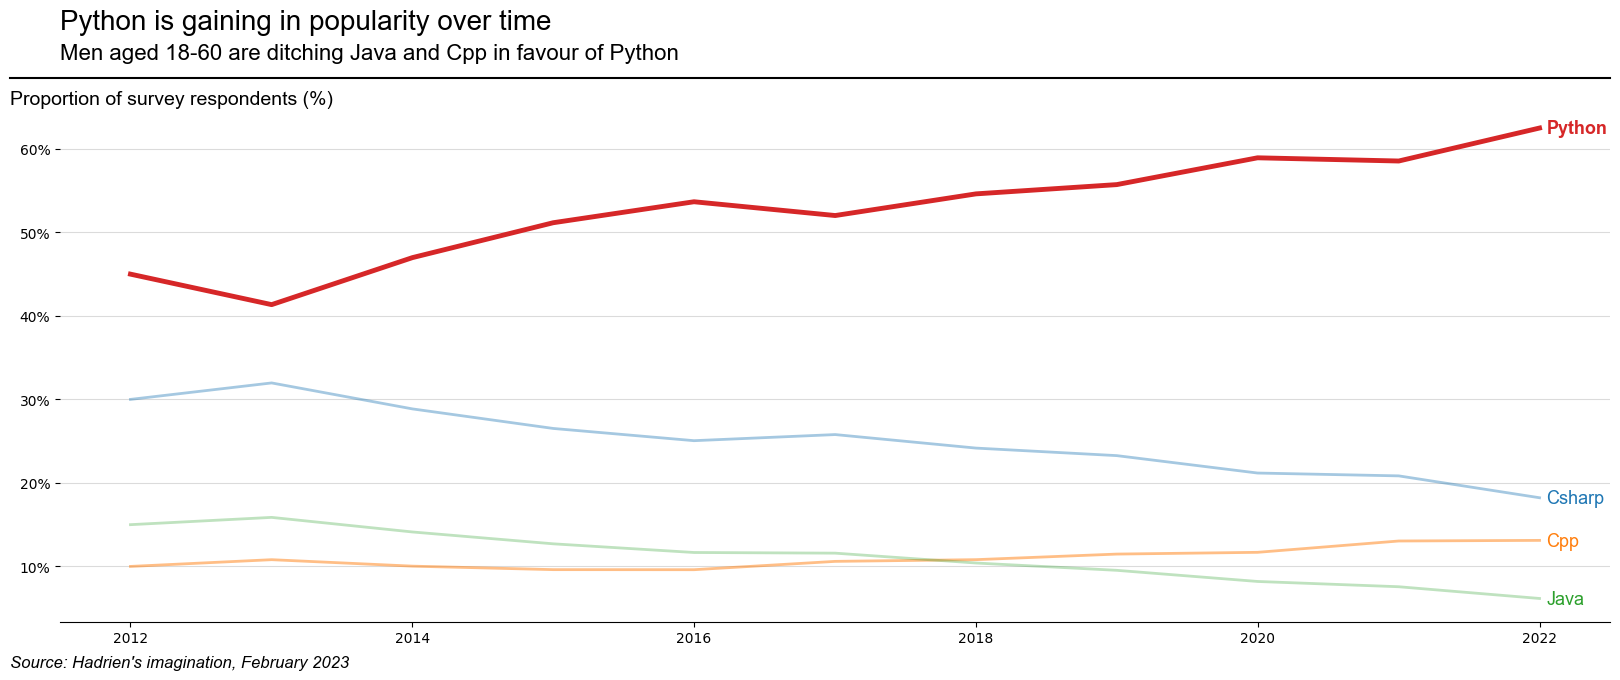

In [3]:
# plot
fig,ax = plt.subplots(figsize = (20,7.5))

# informative title + subtitle
title = 'Python is gaining in popularity over time'
subtitle = 'Men aged 18-60 are ditching Java and Cpp in favour of Python'

# add title + subtitle to plot
plt.text(
    x = 0.125,y = 0.90,s = title,fontname = 'Arial',
    fontsize = 20,ha='left',transform = fig.transFigure
)
plt.text(
    x = 0.125,y = 0.86,s = subtitle,fontname = 'Arial',
    fontsize = 16,ha = 'left',transform = fig.transFigure
)

# lines
plt.plot(df.index,df['Csharp'],linewidth = 2.,color = 'tab:blue',alpha = 0.4)
plt.plot(df.index,df['Cpp'],linewidth = 2.,color = 'tab:orange',alpha = 0.5)
plt.plot(df.index,df['Java'],linewidth = 2.,color = 'tab:green',alpha = 0.3)
plt.plot(df.index,df['Python'],linewidth = 3.5,color = 'tab:red')

# format y-axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals = 0))

# misc - grid and legend
plt.grid(axis = 'both',alpha = 0.45)

# annotate
plt.annotate(
    text = 'Csharp',
    xy = (pd.to_datetime('01-01-2022'),df['Csharp'][-1]),
    textcoords = 'offset points',
    xytext = (5,-4),fontname = 'Arial',fontsize = 13,color = 'tab:blue'
)

# annotate
plt.annotate(
    text = 'Cpp',
    xy = (pd.to_datetime('01-01-2022'),df['Cpp'][-1]),
    textcoords = 'offset points',
    xytext = (5,-4),fontname = 'Arial',fontsize = 13,color = 'tab:orange'
)

# annotate
plt.annotate(
    text = 'Java',
    xy = (pd.to_datetime('01-01-2022'),df['Java'][-1]),
    textcoords = 'offset points',
    xytext = (5,-4),fontname = 'Arial',fontsize = 13,color = 'tab:green'
)

# annotate
plt.annotate(
    text = 'Python',
    xy = (pd.to_datetime('01-01-2022'),df['Python'][-1]),
    textcoords = 'offset points',
    xytext = (5,-4),fontname = 'Arial',fontsize = 13,color = 'tab:red', weight = 'bold'
)

# fiddle with space above chart
plt.subplots_adjust(top=0.8, wspace=0.3)

# turn off spines
plt.gca().spines[['left','right','top']].set_visible(False)

# grid lines
# keep only toned down vertical lines
plt.grid(axis = 'x',alpha = 0.)

# line between titles and chart
plt.gca().plot(
    [0.1, .9], # x co-ords
    [.835, .835], # y co-ords
    transform = fig.transFigure,
    clip_on = False,
    color = 'k',
    linewidth = 1.5
)

# axis description
description = 'Proportion of survey respondents (%)'
plt.text(
    x = 0.1,
    y = 0.8,
    s = description,
    fontname = 'Arial',
    fontsize = 14,
    ha='left',
    transform = fig.transFigure
)

# foot note
footnote = "Source: Hadrien's imagination, February 2023"
plt.text(
    x = 0.1,
    y = 0.05,
    s = footnote,
    fontname = 'Arial',
    fontstyle = 'italic',
    fontsize = 12,
    ha = 'left',
    transform = fig.transFigure
)

plt.show()

## Going further with Bokeh 

In [6]:
import numpy as np
from bokeh.layouts import row
from bokeh.models import Column, ColumnDataSource
from bokeh.models.widgets import Slider
from bokeh.plotting import figure, show
import panel as pn

# Set up data
N = 200
x = np.linspace(0, 4 * np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))


# Set up plot
plot = figure(
    plot_height=400,
    title="my sine wave",
    tools="crosshair,pan,reset,save,wheel_zoom",
    x_range=[0, 4 * np.pi],
    y_range=[-2.5, 2.5],
)

plot.line("x", "y", source=source, line_width=3, line_alpha=0.6)
plot.title.text = "My sine wave"


# Set up widgets
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0)
phase = Slider(title="phase", value=0.0, start=0.0, end=2 * np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1)


# Set up callbacks
def update_data(attrname, old, new):

    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    x = np.linspace(0, 4 * np.pi, N)
    y = a * np.sin(k * x + w) + b

    source.data = dict(x=x, y=y)


for w in [offset, amplitude, phase, freq]:
    w.on_change("value", update_data)


# Set up layouts and add to document
inputs = Column(offset, amplitude, phase, freq, sizing_mode="fixed")
bokeh_component = row(inputs, plot, sizing_mode="stretch_width")

pn.extension(template="fast")
pn.panel(bokeh_component).servable()

Bokeh(Row)